# Exercise 5a - Cognitive Bias

### Task: Give three real-world examples of different types of cognitive bias.

![link](https://img.rasset.ie/000f3659-1600.jpg)

<b>The National Lottery</b> - Every week since the early 1990s my dad has picked the same lottery numbers: 6, 13, 17, 21, 32 and 44. He buys his ticket on Saturday evening about an hour before the cut-off ahead of the draw. The only thing more likely than those numbers not coming up is my mum asking why he bothers, and the reply that the one week he doesn't do it is when his numbers will come out. Of course, any combination of numbers is equally likely to arise, but if he did not get a ticket, and if the numbers did indeed come out, no amount of discussion with either a statistician or his subsequent prison psychologist would persuade him otherwise. My dad mistakenly believes that the numbers he picked, a combination of ages and birthdays, has an outsized significance compared to any other set of numbers, and that they therefore have a greater chance of being picked together.

![link](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Survivorship-bias.svg/1280px-Survivorship-bias.svg.png)

<b>Survivorship bias</b> - Abraham Wald worked in a research group at Columbia University in New York, tasked with helping the American military minimise losses on bombing runs. Wald's group was tasked with working out the optimum amount and location of armour on these planes, without over-exposing them either through under-protection or by slowing them down with too much weight. The image above displays the areas most impacted by enemy ammunition on returning aircraft, and the image below, taken from an article by Jordan Ellenberg on [Medium](https://miro.medium.com/max/1400/1*p5OvFPF077pgTh7ccEkfVw.jpeg), displays the initial dataset that the US Air Force provided:

![link](https://miro.medium.com/max/1400/1*p5OvFPF077pgTh7ccEkfVw.jpeg)

The intuition of the military officers was to add armour in the most impacted areas. Wald pointed out that it was unlikely that the Axis gunners were so accurate from a couple of thousand feet below to never hit the engines, and recommended instead that the dataset was fundamentally incomplete; the chance of a plane surviving a hit to the engine or the fuel lines were low enough that it had impacted the data they had collected.

<b>The appeal to nature</b> - I used to work for a retail company and we would be bombarded by new products being launched that had any number of vague or unverifiable claims on: things were "environmentally-friendly", "biodegradable" (even uranium is biodegradable on a long-enough timeline!) or simply "natural". Many of the people launching these products are smart enough to know that labels like 'organic', 'free-range' or 'compostable' have hefty regulatory rules behind them, but a word like "natural" can be used to mean just about anything. I found an article in [Behavioural Scientist](https://behavioralscientist.org/natural-is-better-how-the-naturalistic-fallacy-derails-public-health/) that fairly well summarised the topic and was co-authored by none other than Dan Ariely. The appeal to nature is rooted in the idea that anything natural is positive, and in the article, Ariely <i>et al</i> explain how this as affected covid vaccination surveys, admitting that their shock at:

    "...how often individuals endorsed the belief that vaccination is unnecessary because the body’s “natural defenses” would do a better job at protecting it from infections."
    
Despite vaccination programs effectively ending diseases like smallpox and polio, anti-vaccination advocates have often harnessed the appeal to nature fallacy, and supported it with a host of specious research, as opposed to the rigid scientific kind, to discourage vaccination. It can be a very powerful device as it aims to take any sort of appeal to scientific reasoning or progress out of the terms of the debate.

# Exercise 5b - Bessel's Correction

### Task: Show that the difference between the standard deviation calculations is greatest for small sample sizes.

In the equation to calculate population or sample standard deviation, both <i>N</i> and <i>n-1</i> act as the denominator. Reducing the value of the denominator has the effect of increasing the value of the overall result, just as 24 divided by 4 produces a smaller value than 24 divided by 3. As stated in an excellent article I found by [Brayton Hall](https://towardsdatascience.com/the-reasoning-behind-bessels-correction-n-1-eeea25ec9bc9) (2021):

    unrepresentative points... will have more of an impact on the calculation of variance. Because the difference between each data point and the sample mean is being squared, the range of possible differences will be smaller than the real range if the population mean was used.   

In [1]:
val1 = int(((24-6)/24)*100)
val2 = int(((24-8)/24)*100)

print(f'6 is {val1}% of 24')
print(f'8 is {val2}% of 24')

6 is 75% of 24
8 is 66% of 24


Further, once data is generated by the various NumPy distribution functions, it will immediately begin assigning data according to that distribution's 'shape'. This means that for really small sample sizes, the data might not begin to resemble that shape until a certain threshold has been met. This can be seen underneath the Small Sample heading below, where the visual presentation of the data does not always immediately resemble a traditional bell curve. I need to do further additional research to find out if there are established thresholds at which a particular dataset is deemed to be considered an accurate representation of the distribution used.

### Large Sample

Below, I've used two randomly-generated, normally-distributed samples that have the same mean and standard variables. They differ only on the number of samples generated. I have used red and yellow vertical lines to display the standard deviations that were inputted and outputted, respectively.

Difference is 0.319


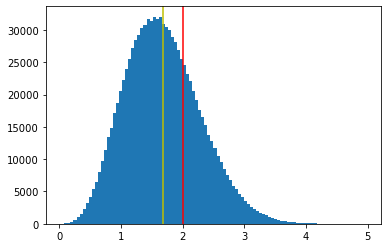

In [2]:
# I've re-used the code here from Ian's notebooks and changed the parameters accordingly, to display three 
# separate samples.

import matplotlib.pyplot as plt
import numpy as np
# Create 100000 samples of size 10 - standard deviation is 2.0 and the mean is 0.0.
sigma = 2.0
samp_lg = np.random.normal(0.0, sigma, (1000000, 5))
# the axis parameter defines how to bin the dataset; an axis of zero would produce the mean per column, while an
# axis of 1 produces 1 mean per row. The default of blank produces a mean for the entire 1000 x 1000 array (see
# GeeksForGeeks reference in the README). In this case the parameter reduces the number of samples from 500,000
# (an array of 5 random items, repeated 100,000 times) down to a mean of each of those repetitions.
stdev_lg = samp_lg.std(axis=1)
sig_l = np.mean(stdev_lg)

plt.hist(stdev_lg,bins=100)

plt.axvline(x=sigma, color='r');
plt.axvline(x=sig_l, color='y');
print(f'Difference is {round(sigma - sig_l,3)}')

In [3]:
# Uncorrected variance.
np.mean(np.square(samp_lg - np.mean(samp_lg)))

3.9966953556017004

In [4]:
# Corrected variance.
np.mean(np.square(samp_lg - np.mean(samp_lg))) * (len(samp_lg) / (len(samp_lg) - 1.0))

3.9966993523010528

### Small Sample

And below, the small sample. As can be seen, the differences between both the variation and the standard deviation are larger on the smaller dataset.

Difference is 0.222


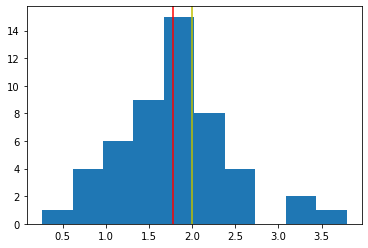

In [5]:
# Uses the same mean and variance, but reduces the sample size
samp_sm = np.random.normal(0.0, sigma, (50, 5))
stdev_sm = samp_sm.std(axis=1)
sig_s = np.mean(stdev_sm)

plt.hist(stdev_sm,bins=10)

plt.axvline(x=sigma, color='y');
plt.axvline(x=sig_s, color='r');
print(f'Difference is {round(sigma - sig_s,3)}')

In [6]:
# Uncorrected
np.mean(np.square(samp_sm - np.mean(samp_sm)))

4.344753471833827

In [7]:
# Corrected
np.mean(np.square(samp_sm - np.mean(samp_sm))) * (len(samp_sm) / (len(samp_sm) - 1.0))

4.433421910034517